# Where Did My Songs Come From?

This is a project to visualize the occurrences of my songs from the playlists that I've made over years. I make a mega playlist each year that combines all of the playlists that I made/listened to for that year. I also recently graduated college so it'll be cool to see which years I listened to specific songs.

In [1]:
import pandas as pd
import spotipy as sp
from utility import get_spotify_client, get_spotify_oauth
import plotly as py
from numpy import pi
import numpy as np
import plotly.graph_objects as go

In [2]:
%%capture
# The capture is so we don't log our spotify credentials. Cuz uh that happened.
client = get_spotify_oauth()


In [3]:
def get_all_playlists(client): 
    output = []
    results = client.current_user_playlists()
    output.extend(results['items'])
    while results['next']:
        results = client.next(results)
        output.extend(results['items'])
    return output

In [4]:
def get_all_songs_in_playlist(client, playlist_id):
    output = []
    results = client.playlist_tracks(playlist_id)
    output.extend(results['items'])
    while results['next']:
        results = client.next(results)
        output.extend(results['items'])
    return output

In [5]:
playlists = get_all_playlists(client)
playlist_ids = [p['id'] for p in playlists]

In [6]:
 named_ids = {p['id']: p['name'] for p in playlists}
len(named_ids)

170

In [7]:
mega_playlist_names = ['UAH Senior Year - The Finale', 'The Ultimate Sacrifice - Junior Year of College', 'Sophomore Year - FA18-SU19', 'Freshman Year - FA17, SP18, SU18']
mega_playlist_ids = [id for id, name in named_ids.items() if name in mega_playlist_names]
mega_playlist_ids, len(mega_playlist_ids) == len(mega_playlist_names)

(['2B2JvYTfcdJjiYqOCnLfTk',
  '2xrssOkBmtZLx2KDOsm8c8',
  '424u2oxJGwBXyY6b0HHdc4',
  '3fTS1zCtcmh3qkgMHbHvwg'],
 True)

In [8]:
mega_playlist_songs = {id: get_all_songs_in_playlist(client, id) for id in mega_playlist_ids}
len(mega_playlist_songs)

4

In [9]:
all_playlist_songs = {id: get_all_songs_in_playlist(client, id) for id in playlist_ids}

In [10]:
selected_playlist_songs = {id: songs for id, songs in all_playlist_songs.items() if 25 <= len(songs) <= 100}

In [11]:
from chord import Chord

In [12]:
def create_links(playlist_songs, min_value=0):
    output = []
    has_seen = []
    for playlist_id_1, songs_1 in playlist_songs.items():
        songs_1_ids = {s['track']['id'] for s in songs_1}
        
        for playlist_id_2, songs_2 in playlist_songs.items():
            if playlist_id_1 == playlist_id_2:
                continue
            if playlist_id_2 in has_seen:
                continue
            
            count = len(songs_1_ids.intersection({s['track']['id'] for s in songs_2}))
            if count < min_value:
                continue
            curr_row = {'source': named_ids[playlist_id_1],
                        'target': named_ids[playlist_id_2],
                        'value': count}
            output.append(curr_row)
        has_seen.append(playlist_id_1)
    return pd.DataFrame.from_records(output)

In [13]:
def create_nodes(playlist_songs):
    output = []
    
    for playlist_id, songs in playlist_songs.items():
        output.append({'index': playlist_id, 'name': named_ids[playlist_id], 'count': len(songs)})
    
    return pd.DataFrame.from_records(output)

In [14]:
links = create_links(selected_playlist_songs)
links

,source,target,value
0,I uh guess it's time to make a new main playlist,Overstepping my boundaries for my friends' wed...,2
1,I uh guess it's time to make a new main playlist,Impatience may not be a virtue but boy do I ha...,8
2,I uh guess it's time to make a new main playlist,Jedimaster4559 Song List,0
3,I uh guess it's time to make a new main playlist,Albums Spring 2021,0
4,I uh guess it's time to make a new main playlist,Albums Fall 2020,0
...,...,...,...
1480,New good,weird al,0
1481,New good,Alternative And Then Some,2
1482,Good,weird al,0
1483,Good,Alternative And Then Some,5


In [15]:
nodes = create_nodes(selected_playlist_songs)
nodes.head()

,index,name,count
0,5NHQGnqIPc81nH4qdVQV4t,I uh guess it's time to make a new main playlist,31
1,3D68XbfWthRxwgVgPukkH7,Overstepping my boundaries for my friends' wed...,26
2,4ulK5fX4XkDOv3A1lEKdFd,Impatience may not be a virtue but boy do I ha...,43
3,5bD4y7J09fmkV3OqhtygvZ,Jedimaster4559 Song List,96
4,6TxUtGPNENVCwzPqkQjDbq,Albums Spring 2021,79


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
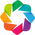

In [16]:
import holoviews as hv
from holoviews import opts, dim
hv.extension('bokeh')
hv.output(size=200)

In [17]:
def rotate_label(plot, element):
    # https://stackoverflow.com/questions/65561927/inverted-label-text-half-turn-for-chord-diagram-on-holoviews-with-bokeh/65610161#65610161
    base_rotation = pi / 2
    white_space = "      "
    angles = plot.handles['text_1_source'].data['angle']
    characters = np.array(plot.handles['text_1_source'].data['text'])
    plot.handles['text_1_source'].data['text'] = np.array([x + white_space if x in characters[np.where((angles < -base_rotation) | (angles > base_rotation))] else x for x in plot.handles['text_1_source'].data['text']])
    plot.handles['text_1_source'].data['text'] = np.array([white_space + x if x in characters[np.where((angles > -base_rotation) | (angles < base_rotation))] else x for x in plot.handles['text_1_source'].data['text']])
    angles[np.where((angles < -base_rotation) | (angles > base_rotation))] += pi
    plot.handles['text_1_glyph'].text_align = "center"

In [18]:
def info_hook(plot, element):
    print(plot.handles.keys())
    print(plot.state)

In [19]:
def inspection_policy_override(plot, element):
    tooltips = [('Source', '@source'),
               ('Target', '@target'),
               ('# of Songs Shared', '@value')]
    plot.handles['hover'].tooltips = tooltips

In [20]:
chord = hv.Chord((links, hv.Dataset(nodes, 'name'))).select(value=(5, None))
chord.opts(opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
                      labels='name', node_color=dim('index').str(),
                      hooks=[rotate_label, inspection_policy_override], inspection_policy='edges'))

:Chord   [source,target]   (value)